In [1]:
from minermeta import MinerMeta


In [2]:
m = MinerMeta()
df = m.compile_lc_data(read_csv=True)


In [6]:
m.build_xgb()

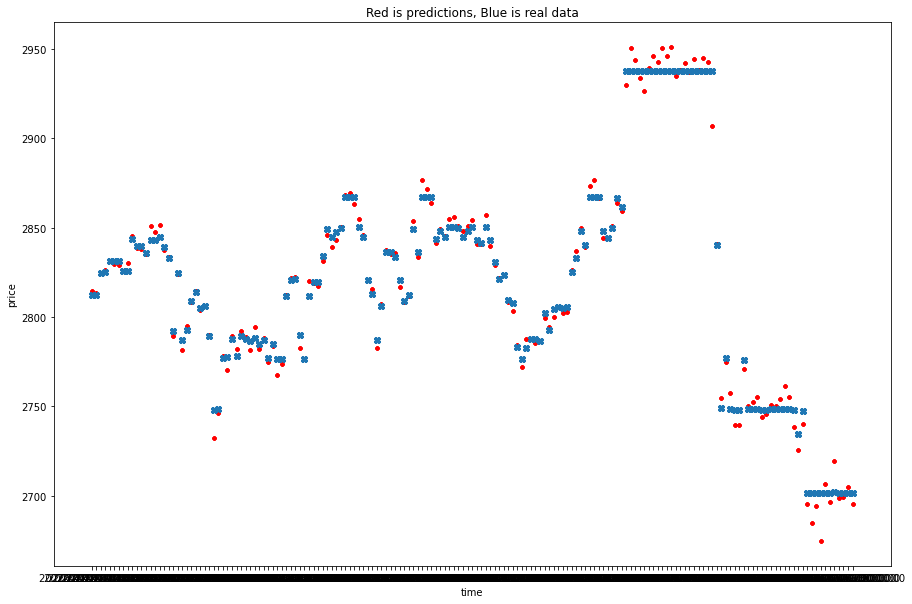

In [7]:
m.predict_and_plot()


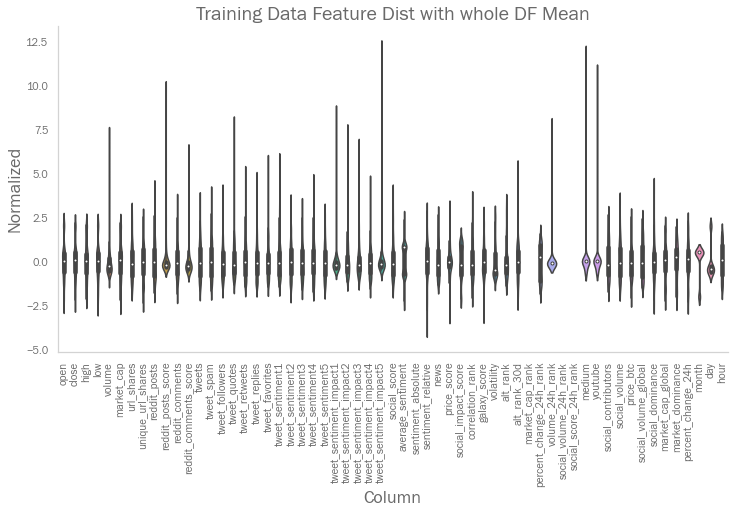

In [8]:
m.plot()